# Autoencoder 自动编码器

## 1. Introduction

### 1.1 What is Autoencoder?

Autoencoder is a type of artificial neural network used in unsupervised learning and semi-supervised learning. Its function is to learn the representation of input information by using the input information as the learning target.

自编码器（autoencoder, AE）是一类在半监督学习和非监督学习中使用的人工神经网络（Artificial Neural Networks, ANNs），其功能是通过将输入信息作为学习目标，对输入信息进行表征学习（representation learning）

### 1.2 Structure of Autoencoder

The Autoencoder consists of two parts: the encoder and the decoder. The encoder is used to map the input information to the hidden layer, and the decoder is used to map the hidden layer to the output layer. The hidden layer is the representation of the input information.

包含编码器（encoder）和解码器（decoder）两部分。编码器用于将输入信息映射到隐藏层，解码器用于将隐藏层映射到输出层。隐藏层是输入信息的表征。

![](https://img-blog.csdnimg.cn/20190531172354847.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2hfX2FuZw==,size_16,color_FFFFFF,t_70)

From above figure, we can see two parts: the first part is the encoder, the second part is the decoder. 

从上图可以看到两个部分：第一个部分是编码器（Encoder），第二个部分是解码器（Decoder），

The encoder and decoder can be any model, usually using neural networks as the encoder and decoder. The input data is reduced to a code through a neural network, and then another neural network is used to decode it to get a generated data that is exactly the same as the input original data. 

编码器和解码器都可以是任意的模型，通常使用神经网络作为编码器和解码器。输入的数据经过神经网络降维到一个编码（code），接着又通过另外一个神经网络去解码得到一个与输入原数据一模一样的生成数据，

Then by comparing these two data, the parameters of the encoder and decoder in this network are trained by minimizing the difference between them.

然后通过比较这两个数据，最小化它们之间的差异来训练这个网络中编码器和解码器的参数。

Based on the learning paradigm, the Autoencoder can be divided into three types: the Contractive Autoencoder, the Regularized Autoencoder, and the Variational Autoencoder. The first two are discriminative models, and the latter is a generative model. The Autoencoder can be a feedforward neural network or a recursive neural network.

按学习范式，自编码器可以被分为收缩自编码器（contractive autoencoder）、正则自编码器（regularized autoencoder）和变分自编码器（Variational AutoEncoder, VAE），其中前两者是判别模型、后者是生成模型。按构筑类型，自编码器可以是前馈结构或递归结构的神经网络。

### 1.3 Application of Autoencoder

Autoencoder has the function of representation learning, which is applied to dimensionality reduction and anomaly detection. Autoencoder constructed with convolutional layers can be applied to computer vision problems, including image denoising, neural style transfer, etc.

自编码器具有一般意义上表征学习算法的功能，被应用于降维（dimensionality reduction）和异常值检测（anomaly detection）。包含卷积层构筑的自编码器可被应用于计算机视觉问题，包括图像降噪（image denoising）、神经风格迁移（neural style transfer）等。

## 2. Autoencoder Construction

将input输入一个encoder编码器，就会得到一个code，这个code也就是输入的一个表示，然后加一个decoder解码器，这时候decoder就会输出一个信息，如果输出的这个信息和一开始的输入信号input是很像的（理想情况下就是一样的），那很明显，我们就有理由相信这个code是靠谱的。所以，我们就通过调整encoder和decoder的参数，使得重构误差最小，这时候我们就得到了输入input信号的第一个表示了，也就是编码code了。因为是无标签数据，所以误差的来源就是直接重构后与原输入相比得到。我们的重构误差最小让我们相信这个code就是原输入信号的良好表达了，或者牵强点说，它和原信号是一模一样的。接着，我们将第一层输出的code当成第二层的输入信号，同样最小化重构误差，就会得到第二层的参数，并且得到第二层输出的code，也就是原输入信息的第二个表达了。其他层就同样的方法炮制就行了（训练这一层，前面层的参数都是固定的，并且他们的decoder已经没用了，都不需要了）。


需要注意的是，整个网络的训练不是一蹴而就的，而是逐层进行。如果按n→m→k
结构，实际上我们是先训练网络n→m→n，得到n→m的变换，然后再训练m→k→m，得到m→k的变换。最终堆叠成SAE，即为n→m→k的结果，整个过程就像一层层往上盖房子，这便是大名鼎鼎的 layer-wise unsuperwised pre-training （逐层非监督预训练），正是导致深度学习（神经网络）在2006年第3次兴起的核心技术。



![](https://img-blog.csdnimg.cn/20190531174754287.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2hfX2FuZw==,size_16,color_FFFFFF,t_70)

若给code加入一定的约束。从数据维度来看，常见以下两种情况：

If the dimension of input is greater than the dimension of code, that is, the transformation from $input\rightarrow code$ is a dimensionality reduction operation, the network tries to describe the original data with a smaller dimension without losing data information. In fact, when the transformation between two layers is linear and the loss function is the mean square error loss function, the network is equivalent to PCA (Principal Component Analysis);

如果input的维度大于code的维度，也就是说从$input\rightarrow code$的变换是一种降维的操作，网络试图以更小的维度来描述原始数据而尽量不损失数据信息。实际上，当两层之间的变换均为线性，且损失函数为平方差损失函数时，该网络等价于PCA(主成分分析)；


如果input的维度小于等于code的维度。这又有什么用呢？其实不好说，但比如我们同时约束code的表达尽量稀疏（有大量维度为0，未被激活），此时的编码器便是大名鼎鼎的“稀疏自编码器”。可为什么稀疏的表达就是好的呢？这就说来话长了，有人试图从人脑机理对比，即人类神经系统在某刺激下，大部分神经元是被抑制的。个人觉得，从特征的角度来看直接些，稀疏的表达意味着系统在尝试去特征选择，找出大量维度中真正重要的若干维度。

## 3. Autoencoder Case Study

### 3.1 基于全连接网络的自编码器

In [1]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os
import matplotlib.pyplot as plt

# 加载数据集
def get_data():
    # 将像素点转换到[-1, 1]之间，使得输入变成一个比较对称的分布，训练容易收敛
    data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    return train_loader

def to_img(x):
    x = (x + 1.) * 0.5
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28, 128),
                                     nn.ReLU(True),
                                     nn.Linear(128, 64),
                                     nn.ReLU(True),
                                     nn.Linear(64, 12),
                                     nn.ReLU(True),
                                     nn.Linear(12, 3))
        self.decoder = nn.Sequential(nn.Linear(3, 12),
                                     nn.ReLU(True),
                                     nn.Linear(12, 64),
                                     nn.ReLU(True),
                                     nn.Linear(64, 128),
                                     nn.ReLU(True),
                                     nn.Linear(128, 28*28),
                                     nn.Tanh())
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode


epoch= 0 tensor(0.2223, device='cuda:0')
0.01
epoch= 1 tensor(0.2091, device='cuda:0')
0.01
epoch= 2 tensor(0.2007, device='cuda:0')
0.01
epoch= 3 tensor(0.1928, device='cuda:0')
0.01
epoch= 4 tensor(0.2042, device='cuda:0')
0.01
epoch: 5, loss is 0.2042459398508072
epoch= 5 tensor(0.2037, device='cuda:0')
0.01
epoch= 6 tensor(0.2123, device='cuda:0')
0.01
epoch= 7 tensor(0.1972, device='cuda:0')
0.01
epoch= 8 tensor(0.1886, device='cuda:0')
0.01
epoch= 9 tensor(0.1810, device='cuda:0')
0.01
epoch: 10, loss is 0.18100722134113312
epoch= 10 tensor(0.1785, device='cuda:0')
0.001
epoch= 11 tensor(0.1804, device='cuda:0')
0.001
epoch= 12 tensor(0.1749, device='cuda:0')
0.001
epoch= 13 tensor(0.1841, device='cuda:0')
0.001
epoch= 14 tensor(0.1842, device='cuda:0')
0.001
epoch: 15, loss is 0.18416298925876617
epoch= 15 tensor(0.1728, device='cuda:0')
0.001
epoch= 16 tensor(0.1743, device='cuda:0')
0.001
epoch= 17 tensor(0.1727, device='cuda:0')
0.001
epoch= 18 tensor(0.1797, device='cuda:0')

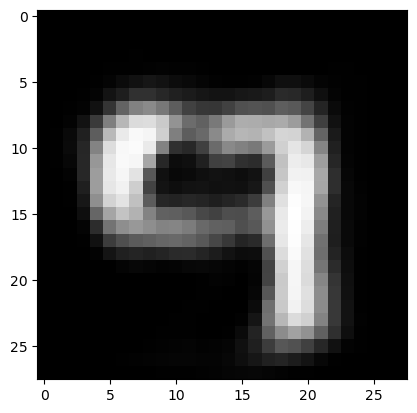

In [2]:

if __name__ == "__main__":
    # 超参数设置
    batch_size = 128
    lr = 1e-2
    weight_decay = 1e-5
    epoches = 40
    model = autoencoder()
    # x = Variable(torch.randn(1, 28*28))
    # encode, decode = model(x)
    # print(encode.shape)
    train_data = get_data()
    criterion = nn.MSELoss()
    optimizier = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    if torch.cuda.is_available():
        model.cuda()
    for epoch in range(epoches):
        if epoch in [epoches * 0.25, epoches * 0.5]:
            for param_group in optimizier.param_groups:
                param_group['lr'] *= 0.1
        for img, _ in train_data:
            img = img.view(img.size(0), -1)
            img = Variable(img.cuda())
            # forward
            _, output = model(img)
            loss = criterion(output, img)
            # backward
            optimizier.zero_grad()
            loss.backward()
            optimizier.step()
        print("epoch=", epoch, loss.data.float())
        for param_group in optimizier.param_groups:
            print(param_group['lr'])
        if (epoch+1) % 5 == 0:
            print("epoch: {}, loss is {}".format((epoch+1), loss.data))
            pic = to_img(output.cpu().data)
            if not os.path.exists('./simple_autoencoder'):
                os.mkdir('./simple_autoencoder')
            save_image(pic, './simple_autoencoder/image_{}.png'.format(epoch + 1))
    # torch.save(model, './autoencoder.pth')
    # model = torch.load('./autoencoder.pth')
    code = Variable(torch.FloatTensor([[1.19, -3.36, 2.06]]).cuda())
    decode = model.decoder(code)
    decode_img = to_img(decode).squeeze()
    decode_img = decode_img.data.cpu().numpy() * 255
    plt.imshow(decode_img.astype('uint8'))
    plt.show()


### 3.2 基于卷积网络的自编码器

In [2]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os
import matplotlib.pyplot as plt

# 加载数据集
def get_data():
    # 将像素点转换到[-1, 1]之间，使得输入变成一个比较对称的分布，训练容易收敛
    data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    return train_loader

def to_img(x):
    x = (x + 1.) * 0.5
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # (b, 16, 10, 10)
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # (b, 16, 5, 5)
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # (b, 8, 3, 3)
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # (b, 8, 2, 2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # (b, 16, 5, 5)
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # (b, 8, 15, 15)
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # (b, 1, 28, 28)
            nn.Tanh()
        )
    def forward(self, x):
        encode = self.encoder(x)
        decode = self.decoder(encode)
        return encode, decode

if __name__ == "__main__":
    # 超参数设置
    batch_size = 128
    lr = 1e-2
    weight_decay = 1e-5
    epoches = 100
    model = autoencoder()
    # x = Variable(torch.randn(1, 28*28))
    # encode, decode = model(x)
    # print(encode.shape)
    train_data = get_data()
    criterion = nn.MSELoss()
    optimizier = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    if torch.cuda.is_available():
        model.cuda()
    for epoch in range(epoches):
        if epoch in [epoches * 0.25, epoches * 0.5]:
            for param_group in optimizier.param_groups:
                param_group['lr'] *= 0.1
        for img, _ in train_data:
            # img = img.view(img.size(0), -1)
            img = Variable(img.cuda())
            # forward
            _, output = model(img)
            loss = criterion(output, img)
            # backward
            optimizier.zero_grad()
            loss.backward()
            optimizier.step()
        print("epoch=", epoch, loss.data.float())
        for param_group in optimizier.param_groups:
            print(param_group['lr'])
        if (epoch+1) % 5 == 0:
            print("epoch: {}, loss is {}".format((epoch+1), loss.data))
            pic = to_img(output.cpu().data)
            if not os.path.exists('./simple_autoencoder'):
                os.mkdir('./simple_autoencoder')
            save_image(pic, './simple_autoencoder/image_{}.png'.format(epoch + 1))
    torch.save(model, './autoencoder.pth')
    # model = torch.load('./autoencoder.pth')
    code = Variable(torch.FloatTensor([[1.19, -3.36, 2.06]]).cuda())
    decode = model.decoder(code)
    decode_img = to_img(decode).squeeze()
    decode_img = decode_img.data.cpu().data * 255
    plt.imshow(decode_img.numpy().astype('uint8'), cmap='gray')
    save_image(decode_img, './simple_autoencoder/image_code.png')
    plt.show()


epoch= 0 tensor(0.1746, device='cuda:0')
0.01
epoch= 1 tensor(0.1520, device='cuda:0')
0.01
epoch= 2 tensor(0.1463, device='cuda:0')
0.01
epoch= 3 tensor(0.1458, device='cuda:0')
0.01
epoch= 4 tensor(0.1371, device='cuda:0')
0.01
epoch: 5, loss is 0.13708260655403137
epoch= 5 tensor(0.1431, device='cuda:0')
0.01
epoch= 6 tensor(0.1422, device='cuda:0')
0.01
epoch= 7 tensor(0.1365, device='cuda:0')
0.01
epoch= 8 tensor(0.1376, device='cuda:0')
0.01
epoch= 9 tensor(0.1335, device='cuda:0')
0.01
epoch: 10, loss is 0.13348431885242462
epoch= 10 tensor(0.1237, device='cuda:0')
0.01
epoch= 11 tensor(0.1319, device='cuda:0')
0.01
epoch= 12 tensor(0.1225, device='cuda:0')
0.01
epoch= 13 tensor(0.1322, device='cuda:0')
0.01
epoch= 14 tensor(0.1167, device='cuda:0')
0.01
epoch: 15, loss is 0.11674923449754715
epoch= 15 tensor(0.1224, device='cuda:0')
0.01
epoch= 16 tensor(0.1266, device='cuda:0')
0.01
epoch= 17 tensor(0.1243, device='cuda:0')
0.01
epoch= 18 tensor(0.1249, device='cuda:0')
0.01
e

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv_transpose2d, but got input of size: [1, 3]

### 3.3 Variational AutoEncoder 变分自动编码器

变分自动编码器（Variational AutoEncoder）是自动编码器的升级版本，它的结构和自动编码器是相似的，也是由编码器和解码器构成的。

在自动编码器中，需要一个输入图片，然后将输入图片编码之后得到一个隐含向量，这比随机取一个随机向量好，因为这包含着原图片的信息，然后将隐含信息解码得到与原图片对应的照片。但是这样并不能生成任意图片，因为没办法构造隐含向量，需要通过一张图片输入编码才知道得到的隐含向量是什么，这时就可以通过变分自动编码器解决这个问题。

其实原理很简单，只需要在编码过程中给它增加一些限制，迫使它生成的隐含向量能够粗略地遵循一个标准正态分布，这就是它与一般的自动编码器最大的不同。这样生成一张新图片就很简单了，只需要给它一个标准正态分布的随机隐含向量，通过解码器就能够生成想要的图片，而不需要先给它一张原始图片编码。

在实际情况中，需要在模型的准确率和隐含向量服从标准正态分布之间做一个权衡，所谓模型的准确率就是指解码器生成的图片与原始图片的相似程度。可以让神经网络自己做这个决定，只需要将两者都做一个loss，然后求和作为总的loss，这样网络就能够自己选择如何做才能使这个总的loss下降。另外要衡量两种分布的相似程度，需要引入一个新的概念，KL divergence，这是用来衡量两种分布相似程度的统计量，它越小，表示两种概率分布越接近。

对于离散的概率分布，定义如下：
$$D_{KL}(P \parallel Q) = \sum_i P(i) \log\frac{P(i)}{Q(i)}\$$
对于连续的概率分布，定义如下：
$$D_{KL}(P \parallel Q) = \int_{-\infty}^{\infty} p(x) \log\frac{p(x)}{q(x)} \, dx$$


这里就是用KL divergence 表示隐含向量与标准正态分布之间差异的loss，另外一个loss仍然使用生成图片与原图片的均方误差来表示。

这里的变分编码器使用了一个技巧——"重新参数化"来解决KL divergence的计算问题。这时不再是每次生成一个隐含向量，而是生成两个向量：一个表示均值，一个表示标准差，然后通过这两个统计量合成隐含向量，用一个标准正太分布先乘标准差再加上均值就行了，这里默认编码之后的隐含向量是服从一个正态分布的。这个时候要让均值尽可能接近0，标准差尽可能接近1。

代码如下

In [ ]:
import os
import torch
from torch import nn, optim
from torch.autograd import Variable
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.utils import save_image
# 加载数据集
def get_data():
    data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    train_data = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
    return train_loader

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)    # 均值
        self.fc22 = nn.Linear(400, 20)    # 方差
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encoder(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc21(h1)
        logvar = self.fc22(h1)
        return mu, logvar

    def decoder(self, z):
        h3 = F.relu(self.fc3(z))
        x = F.tanh(self.fc4(h3))
        return x
    # 重新参数化
    def reparametrize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()   # 计算标准差
        if torch.cuda.is_available():
            eps = torch.cuda.FloatTensor(std.size()).normal_()    # 从标准的正态分布中随机采样一个eps
        else:
            eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps)
        return eps.mul(std).add_(mu)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparametrize(mu, logvar)
        return self.decoder(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    MSE = reconstruction_function(recon_x, x)
    # loss = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.sum(KLD_element).mul_(-0.5)
    # KL divergence
    return MSE + KLD

def to_img(x):
    x = (x + 1.) * 0.5
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

if __name__ == '__main__':
    # 超参数设置
    batch_size = 128
    lr = 1e-3
    epoches = 100

    model = VAE()
    if torch.cuda.is_available():
        model.cuda()

    train_data = get_data()

    reconstruction_function = nn.MSELoss(reduction='sum')
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epoches):
        for img, _ in train_data:
            img = img.view(img.size(0), -1)
            img = Variable(img)
            if torch.cuda.is_available():
                img = img.cuda()
            # forward
            output, mu, logvar = model(img)
            loss = loss_function(output, img, mu, logvar)/img.size(0)
            # backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("epoch=", epoch, loss.data.float())
        if (epoch+1) % 10 == 0:
            print("epoch = {}, loss is {}".format(epoch+1, loss.data))
            pic = to_img(output.cpu().data)
            if not os.path.exists('./vae_img1'):
                os.mkdir('./vae_img1')
            save_image(pic, './vae_img1/image_{}.png'.format(epoch + 1))
    torch.save(model, './vae.pth')


运行100个eopch之后，结果如下，可以看出来结果比上面的自动编码器清晰一点，本质上VAE就是在encoder的结果添加了高斯噪声，通过训练要使得decoder对噪声有一定的鲁棒性，这样的话我们生成一张图片就没有必须用一张图片先做编码了，可以想象，我们只需要利用训练好的encoder对一张图片编码得到其分布后，符合这个分布的隐含向量理论上都可以通过decoder得到类似这张图片的图片。

KL越小，噪声越大（可以这麽理解，我们强行让z的分布符合正态分布，其和N(0,1)越接近，KL越小，相当于我们添加的噪声越大），所以直觉上来想loss合并后的训练过程：

- 当decoder 还没有训练好时（重构误差远大于KLloss），就会适当降低噪声（KLloss增加），使得拟合起来容易一些（重构误差开始下降）；

- 反之，如果decoder训练得还不错时（重构误差小于KLloss），这时候噪声就会增加（KLloss减少），使得拟合更加困难了（重构误差又开始增加），这时候decoder就要想办法提高它的生成能力了。